**Name:** Bala Guga Gopal S

**Script Name:** 3.1 Radial basis function networks for classification of XOR problem

**Script Description:** Implementing Radial basis function networks for classification of XOR problem

# Implementation of XOR Gate Using Radial Basis Function Network

A RBFN (Radial Basis Function Network) is a type of neural network. The RBFN method is more intuitive than the MLP method. The similarity of the input to examples from the training set is used by an RBFN to do classification. Each RBFN neuron holds a "prototype," which is simply one of the training set's instances. When a new input needs to be classified, each neuron calculates the Euclidean distance between it and its prototype. As a result, if the input resembles class A prototypes more closely than class B prototypes, it is classed as class A.

### RBF Network

![image](https://user-images.githubusercontent.com/59637425/151915460-f587b548-8d04-4088-a21d-28d9b7c5fe43.png)



### The Input Vector:
The input vector is the n-dimensional vector that you are trying to classify. The entire input vector is shown to each of the RBF neurons.

### The RBF Neurons:
Each RBF neuron stores a “prototype” vector which is just one of the vectors from the training set. Each RBF neuron compares the input vector to its prototype and outputs a value between 0 and 1 which is a measure of similarity. If the input is equal to the prototype, then the output of that RBF neuron will be 1. As the distance between the input and prototype grows, the response falls off exponentially towards 0. The shape of the RBF neuron’s response is a bell curve, as illustrated in the network architecture diagram. The neuron’s response value is also called its “activation” value. The prototype vector is also often called the neuron’s “centre”, since it’s the value at the centre of the bell curve.

### RBF Neuron Activation Function:
Each RBF neuron computes a measure of the similarity between the input and its prototype vector (taken from the training set). Input vectors which are more similar to the prototype return a result closer to 1. There are different possible choices of similarity functions, but the most popular is based on the Gaussian. Below is the equation for a Gaussian with a one-dimensional input.

![image](https://user-images.githubusercontent.com/59637425/151915720-b6a26b34-d106-4216-bc6c-b8c5a2684780.png)

Where x is the input, mu is the mean, and sigma is the standard deviation. This produces the familiar bell curve shown below, which is centered at the mean, mu (in the below plot the mean is 5 and sigma is 1).

The RBF neuron activation function is slightly different, and is typically written as:
![image](https://user-images.githubusercontent.com/59637425/151915876-6792310e-789d-4da0-829e-b1d2acdf47c4.png)



## The XOR problem

![image](https://user-images.githubusercontent.com/59637425/151929736-7ee0397a-37d9-40b5-861a-d416c1b087f4.png)
 
 ![image](https://user-images.githubusercontent.com/59637425/151929872-82f63ffe-b571-4e36-9a92-c3d3346f78f5.png)

![image](https://user-images.githubusercontent.com/59637425/151929964-b28bf0b7-4f98-43b3-97fb-de80cefe0c0a.png)


In [ ]:
# import Libraies
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Intializing Gaussian RBF 
def gaussian_rbf(x, landmark, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x - landmark)**2)

In [ ]:
def end_to_end(X1, X2, ys, mu1, mu2):
    from_1 = [gaussian_rbf(i, mu1) for i in zip(X1, X2)]
    from_2 = [gaussian_rbf(i, mu2) for i in zip(X1, X2)]
    # plot
    
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.scatter((x1[0], x1[3]), (x2[0], x2[3]), label="Class_0")
    plt.scatter((x1[1], x1[2]), (x2[1], x2[2]), label="Class_1")
    plt.xlabel("$X1$", fontsize=15)
    plt.ylabel("$X2$", fontsize=15)
    plt.title("Xor: Linearly Inseparable", fontsize=15)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(from_1[0], from_2[0], label="Class_0")
    plt.scatter(from_1[1], from_2[1], label="Class_1")
    plt.scatter(from_1[2], from_2[2], label="Class_1")
    plt.scatter(from_1[3], from_2[3], label="Class_0")
    plt.plot([0, 0.95], [0.95, 0], "k--")
    plt.annotate("Seperating hyperplane", xy=(0.4, 0.55), xytext=(0.55, 0.66),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.xlabel(f"$mu1$: {(mu1)}", fontsize=15)
    plt.ylabel(f"$mu2$: {(mu2)}", fontsize=15)
    plt.title("Transformed Inputs: Linearly Seperable", fontsize=15)
    plt.legend()

    # solving problem using matrices form
    # AW = Y
    A = []

    for i, j in zip(from_1, from_2):
        temp = []
        temp.append(i)
        temp.append(j)
        temp.append(1)
        A.append(temp)
    
    A = np.array(A)
    W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)
    print(np.round(A.dot(W)))
    print(ys)
    print(f"Weights: {W}")
    return W

In [ ]:
def predict_matrix(point, weights):
    gaussian_rbf_0 = gaussian_rbf(np.array(point), mu1)
    gaussian_rbf_1 = gaussian_rbf(np.array(point), mu2)
    A = np.array([gaussian_rbf_0, gaussian_rbf_1, 1])
    return np.round(A.dot(weights))

[0. 1. 1. 0.]
[0 1 1 0]
Weights: [ 2.5026503   2.5026503  -1.84134719]
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


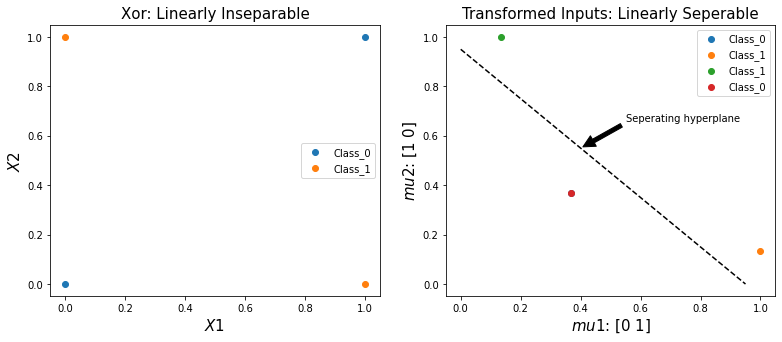

In [ ]:
# points
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0])

# centers
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])

w = end_to_end(x1, x2, ys, mu1, mu2)

# testing

print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")

[0. 1. 1. 0.]
[0 1 1 0]
Weights: [-2.5026503  -2.5026503   2.84134719]
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


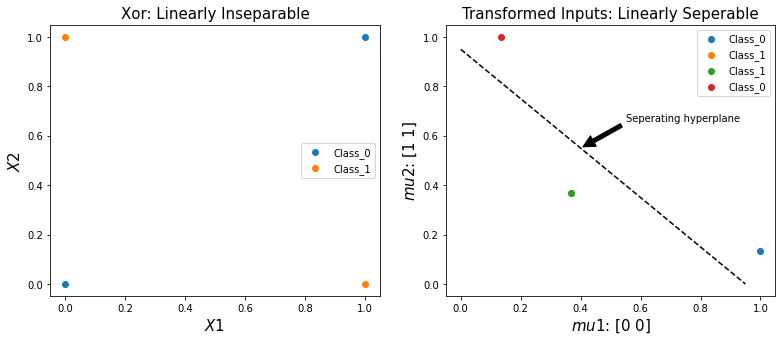

In [ ]:
# centers
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])

w = end_to_end(x1, x2, ys, mu1, mu2)

# testing

print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")